Webcam started successfully. Capturing at 360x380.


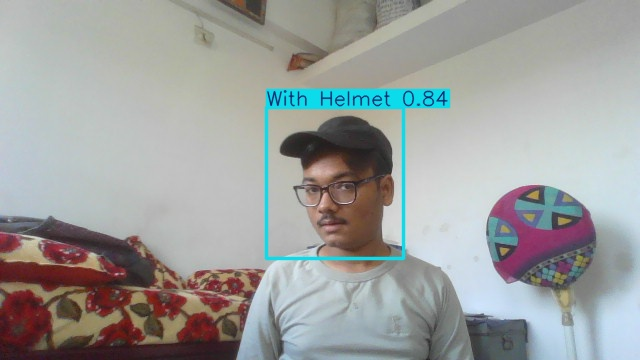

In [ ]:
## CODE CELL 1: Setup and model load
from ultralytics import YOLO
import cv2
import numpy as np
# We keep these for in-line display update in Jupyter
from IPython.display import display, Image 
import time

# Load trained model outside the loop for efficiency
# NOTE: Ensure this path is correct for your local machine
model = YOLO("D:/Forth Year Project/best_helmet_model_YOLOv8n.pt") 

# --- Webcam Setup ---
# Initialize the video capture object
# Argument '0' typically refers to the default built-in webcam
cap = cv2.VideoCapture(0)

# Set the desired frame width and height
# This is optional but good practice for consistency
FRAME_WIDTH = 360
FRAME_HEIGHT = 380
cap.set(cv2.CAP_PROP_FRAME_WIDTH, FRAME_WIDTH)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, FRAME_HEIGHT)

# Check if the webcam opened successfully
if not cap.isOpened():
    print("ERROR: Could not open webcam.")
else:
    print(f"Webcam started successfully. Capturing at {FRAME_WIDTH}x{FRAME_HEIGHT}.")


## CODE CELL 2: Run Detection and Display

# Create a temporary image display placeholder
display_handle = display(Image(data=b''), display_id=True)
count = 0

# Loop for live detection
try:
    while cap.isOpened():
        # 1. Capture the frame from the local webcam
        ret, frame = cap.read() 
        
        if not ret:
            print("ERROR: Can't receive frame (stream end?). Exiting ...")
            break

        # 2. Run YOLO detection
        # Note: We run predict on the frame (NumPy array)
        results = model.predict(source=frame, conf=0.75, verbose=False)
        annotated_frame = results[0].plot()

        # 3. Convert the annotated frame back to JPEG for Jupyter display
        # Note: OpenCV reads frames in BGR format, but imencode handles conversion to JPEG.
        _, buffer = cv2.imencode('.jpg', annotated_frame)
        jpg_as_text = buffer.tobytes()

        # 4. Update the displayed image in the Jupyter cell
        display_handle.update(Image(data=jpg_as_text))

        # Add a delay for display/processing speed (e.g., ~10 FPS)
        # time.sleep(0.05) # 0.05 seconds = 20 FPS max

        # Optional: Press 'q' to stop (Requires a workaround in Jupyter for interactive break)
        # For simplicity in Jupyter, we'll use a fixed frame count or manually stop the cell.
        
        # Optional frame counter to prevent infinite loop
        # count += 1
        # if count > 200:
        #     print("Processed 200 frames. Stopping.")
        #     break

except KeyboardInterrupt:
    print("\nDetection interrupted by user (KeyboardInterrupt).")
except Exception as e:
    print(f"\nAn error occurred: {e}")

finally:
    # 5. Cleanly release the webcam resource
    cap.release()
    # Optional: Clear the final image display
    display_handle.update(Image(data=b'')) 
    print("Webcam stopped and resources released.")